# Syndrome measurements for stabilizer codes

<div style="width:100%;text-align:right;font-size:0.75em;opacity:0.2">Latex macros</div>
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\bra}[1]{\langle #1|} $
$\newcommand{\iu}{{i\mkern1mu}}$
$ \newcommand{\e}{\mathrm{e}}$
$\newcommand{\bigo}{\mathcal{O}}$
$\newcommand{\set}[1]{\{#1\}}$
$\newcommand{\oper}[1]{\mathcal{#1}}$
$\newcommand{\st}[1]{\mathcal{#1}}$
$\newcommand{\vecs}[1]{\mathcal{#1}}$
$\newcommand{\group}[1]{\mathcal{#1}}$
$\newcommand{\union}{\hspace{0.25em}\cup\hspace{0.25em}}$

We will revisit syndrome measurements now, and demonstrate a general algorithm to construct them for stabilizer codes.

Our working example will be the Steane code.

In [1]:
import stac
cd = stac.CommonCodes.generate_code("[[7,1,3]]")
stac.print_matrix(cd.generator_matrix, augmented=True)

<IPython.core.display.Math object>

As you might recall, we said that for stabilizer codes, one has to measure each generator in turn. This is done via the following algorithm.
```
for i in range(num_generators):
    self.syndrome_circuit.append(["h", n+i])

for i in range(num_generators):
    for j in range(num_physical_qubits):
        if gens_x[i, j] and gens_z[i, j]:
            syndrome_circuit.append(["cx", n+i, j])
            syndrome_circuit.append(["cz", n+i, j])
        elif gens_x[i, j]:
            syndrome_circuit.append(["cx", n+i, j])
        elif gens_z[i, j]:
            syndrome_circuit.append(["cz", n+i, j])

for i in range(self.num_generators):
    syndrome_circuit.append(["h", n+i])
    
for i in range(num_generators):
        syndrome_circuit.append(['MR', self.num_physical_qubits+i])
```

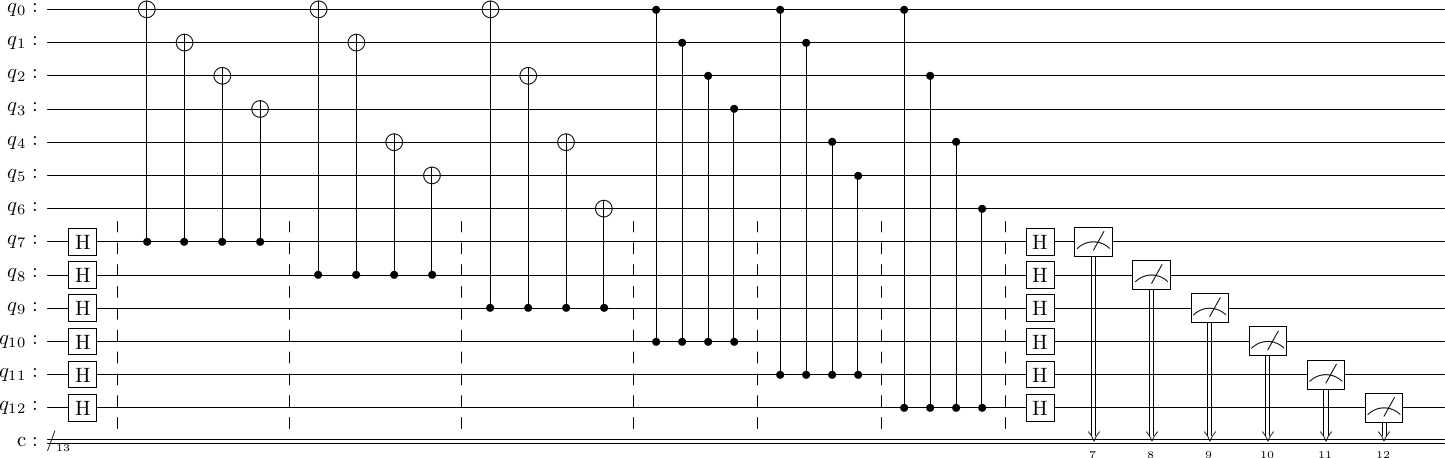

In [2]:
cd.construct_syndrome_circuit();
cd.syndrome_circuit.draw()

To use this in practice, we will

1. Encode the zero state
2. Introduce an error
3. Measure the stabilizers

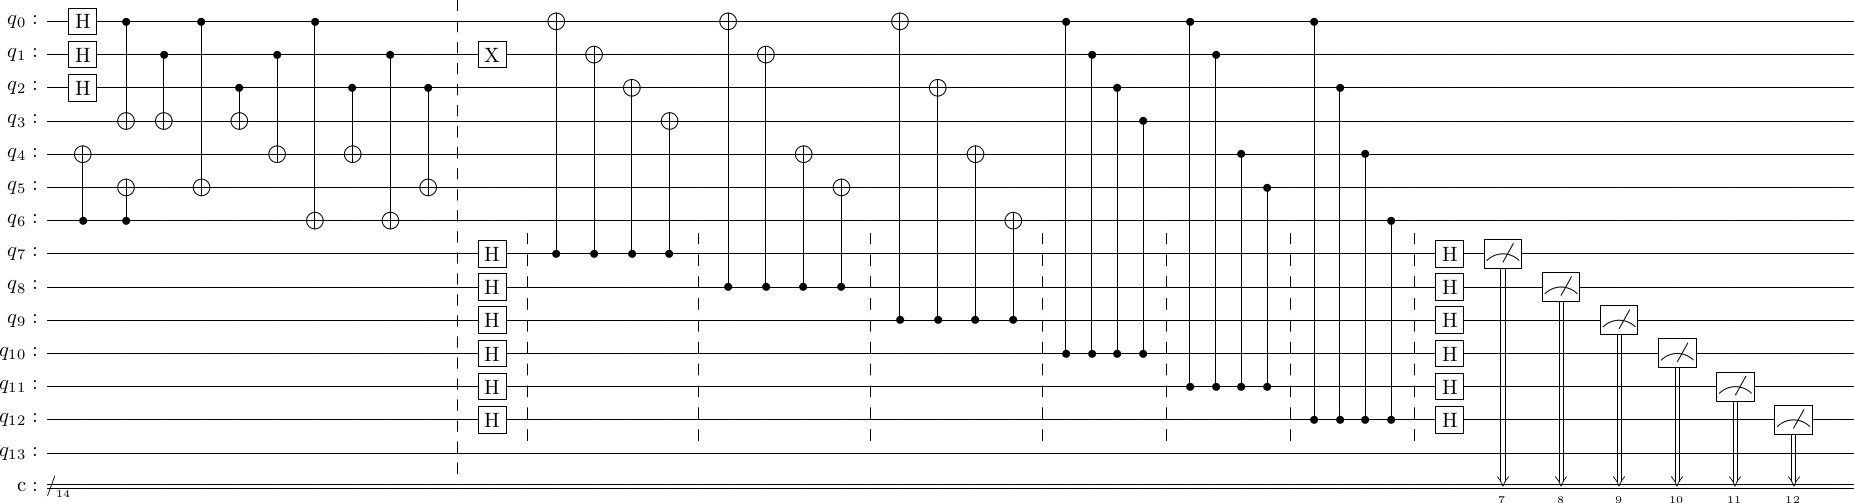

[0 0 0 1 1 0]


In [5]:
# Step 1
circ = cd.construct_encoding_circuit()
circ.append('TICK', 0, cd.num_physical_qubits+cd.num_generators)

# Step 2
circ.append('X', 1)

# Step 3
circ += cd.syndrome_circuit

circ.draw()

# we use stim to simulate this circuit
import stim
stim_circ = stim.Circuit(circ.stim())
sample = stim_circ.compile_sampler().sample(1)[0]
print(1*sample)

As we can see, an $X$ error on the 2nd qubit leads to a the 3rd and 5th generators failing (counting from 0). The syndrome vector is the $n+2=9$th column (counting from 1) of the generator matrix, because as discussed previously it is the $Z$-type stabilizer generators that detect bit-flip errors. In this way, each of the $n$ $X$-type errors and $n$ $Z$-type errors correspond to one of the columns of the generator matrix.

#### Task 1
Determine the syndromes for each possible one qubit $X$ error and each possible one qubit $Z$ error.

In [ ]:
#

#### Task 2
Determine the syndromes when there is a two qubit $X$ error (errors such as $X_0 X_3$). Compare the syndromes with the one-qubit error syndromes. What does this tell you about correcting two-qubit errors with the Steane code?

In [ ]:
#